In [1]:
from regression import *
from zkrp import *
import numpy as np
import pandas as pd
from code_zq.comparison import *
from tqdm import tqdm

In [2]:
def trans_data(l):
    res = []
    for i in l:
        if type(i) != tuple:
            res.append(i)
        else:
            for ii in i:
                res.append(ii)
    return res


def data_comparasion(x, y, x_test, y_test, betahat_detail=False, evallist = ['RMSE', 'NHD', 'IOR', 'DC']):
    x = x
    y = y
    x_test = x_test
    y_test = y_test
    ntrain = x.shape[0]
    ntest = x_test.shape[0]
    res = []
    evallist = evallist

    x_l = x[:,0].reshape((ntrain,1))
    x_u = x[:,1].reshape((ntrain,1))
    x_c = x_u/2 + x_l/2
    x_r = x_u/2 - x_l/2
    y_l = y[:,0].reshape((ntrain,1))
    y_u = y[:,1].reshape((ntrain,1))
    y_c = y_u/2 + y_l/2
    y_r = y_u/2 - y_l/2
    y_c_test = y_test[:,1].reshape((ntest,1))/2 + y_test[:,0].reshape((ntest,1))/2
    y_r_test = y_test[:,1].reshape((ntest,1))/2 - y_test[:,0].reshape((ntest,1))/2
    x_c_test = x_test[:,1].reshape((ntest,1))/2 + x_test[:,0].reshape((ntest,1))/2
    x_r_test = x_test[:,1].reshape((ntest,1))/2 - x_test[:,0].reshape((ntest,1))/2

    ### HF_Med-Method
    a_c_hathfmed, b_c_hathfmed, a_r_hathfmed, b_r_hathfmed = HF_Med_Method(x, y)

    yhat_c_HFmed = a_c_hathfmed * x_c_test + b_c_hathfmed
    yhat_r_HFmed = a_r_hathfmed * x_r_test + b_r_hathfmed
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### HF_Qd-Method
    a_c_hatqd, b_c_hatqd, a_r_hatqd, b_r_hatqd = HF_Qd_Method(x, y)

    yhat_c_HFqd = a_c_hatqd * x_c_test + b_c_hatqd
    yhat_r_HFqd = a_r_hatqd * x_r_test + b_r_hatqd
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### Med-Method
    # a_c_hatmed, b_c_hatmed, a_r_hatmed, b_r_hatmed = Medreg_Method(x, y)
    #
    # yhat_c_med = a_c_hatmed * x_c_test + b_c_hatmed
    # yhat_r_med = a_r_hatmed * x_r_test + b_r_hatmed
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

   ### HF1-Method
    a_c_hat1, b_c_hat1, a_r_hat1, b_r_hat1 = HF_Method1(x,y)
    # print("done hf1")

    yhat_c_HF1 = a_c_hat1 * x_c_test + b_c_hat1
    yhat_r_HF1 = a_r_hat1 * x_r_test + b_r_hat1
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### HF2-Method
    a_c_hat2, b_c_hat2, a_r_hat2, b_r_hat2 = HF_Method2(x,y)
    # print("done hf2")

    yhat_c_HF2 = a_c_hat2 * x_c_test + b_c_hat2
    yhat_r_HF2 = a_r_hat2 * x_r_test + b_r_hat2
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### CM_Method
    hatBeta_CM = CM_Method(x_c, y_c)
    # print("done cm")

    yhat_c_CM = predict(x_c_test, hatBeta_CM)
    yhat_r_CM = predict(x_r_test, hatBeta_CM)

    ### CRM_Method
    hatBeta_c_CRM, hatBeta_r_CRM = CRM_Method(x_c, y_c, x_r, y_r)
    # print("done crm")

    yhat_c_CRM = predict(x_c_test, hatBeta_c_CRM)
    yhat_r_CRM = predict(x_r_test, hatBeta_r_CRM)

    ### CCRM_Method
    hatBeta_c_CCRM, hatBeta_r_CCRM = CCRM_Method(x_c, y_c, x_r, y_r)
    # print("done ccrm")

    yhat_c_CCRM = predict(x_c_test, hatBeta_c_CCRM)
    yhat_r_CCRM = predict(x_r_test, hatBeta_r_CCRM)

    betahat_list = [[a_c_hathfmed, b_c_hathfmed, a_r_hathfmed, b_r_hathfmed],
                    [a_c_hatqd, b_c_hatqd, a_r_hatqd, b_r_hatqd],
                    [a_c_hat1, b_c_hat1, a_r_hat1, b_r_hat1],
                    [a_c_hat2, b_c_hat2, a_r_hat2, b_r_hat2],
                    [hatBeta_CM],
                    [hatBeta_c_CRM, hatBeta_r_CRM],
                    [hatBeta_c_CCRM, hatBeta_r_CCRM]]

    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HFmed, yhat_r_HFmed, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HFqd, yhat_r_HFqd, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF1, yhat_r_HF1, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF2, yhat_r_HF2, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CM, yhat_r_CM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CRM, yhat_r_CRM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CCRM, yhat_r_CCRM, method=i, detail=True) for i in evallist]))

    if betahat_detail:
        return res, betahat_list
    else:
        return res


def trans_to_datakxl(train, test):
    xtrain = np.array(train).T[:,0:2]
    ytrain = np.array(train).T[:,2:4]
    xtest = np.array(test).T[:,0:2]
    ytest = np.array(test).T[:,2:4]
    train_x = np.vstack((xtrain[:,0]-xtrain[:,1], xtrain[:,0]+xtrain[:,1])).T
    train_y = np.vstack((ytrain[:,0]-ytrain[:,1], ytrain[:,0]+ytrain[:,1])).T
    test_x = np.vstack((xtest[:,0]-xtest[:,1], xtest[:,0]+xtest[:,1])).T
    test_y = np.vstack((ytest[:,0]-ytest[:,1], ytest[:,0]+ytest[:,1])).T
    return train_x, train_y, test_x, test_y


### CCRM 数据实验部分

In [3]:
def comparison2(a,b,c,d,e,f,g,h,i,j, path, mess=False):
    eval_HFmed = []
    eval_HFqd = []
    eval_med = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for iter in tqdm(range(50)):
        if mess:
            train, test, beta0, beta1, betastar = data_generation2(375, a, b, c, d, e, f, g, h, i, j, iter)
        else:
            train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, iter)
        x, y, x_test, y_test = trans_to_datakxl(train, test)

        result = data_comparasion(x, y, x_test, y_test)
        eval_HFmed.append(result[0])
        eval_HFqd.append(result[1])
        eval_med.append(result[2])
        eval_HF1.append(result[3])
        eval_HF2.append(result[4])
        eval_CM.append(result[5])
        eval_CRM.append(result[6])
        eval_CCRM.append(result[7])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HFqd = [np.mean(np.array(eval_HFqd),axis=0), np.var(np.array(eval_HFqd),axis=0)]
    EV_med = [np.mean(np.array(eval_med),axis=0), np.var(np.array(eval_med),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HFqd[0][i], EV_HFqd[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_med[0][i], EV_med[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HFmed', 'HFqd', 'Med', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)


def plot_CCRM_data(a,b,c,d,e,f,g,h,i,j,mess=False):
    if mess:
        train, test, beta0, beta1, betastar = data_generation2(375, a, b, c, d, e, f, g, h, i, j, 0)
    else:
        train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, 0)
    x, y, x_test, y_test = trans_to_datakxl(train, test)
    show3(x,y,varname=["x", "y"])

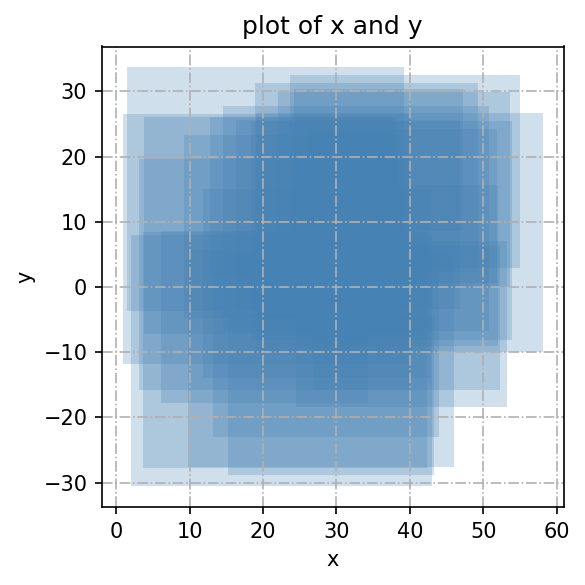

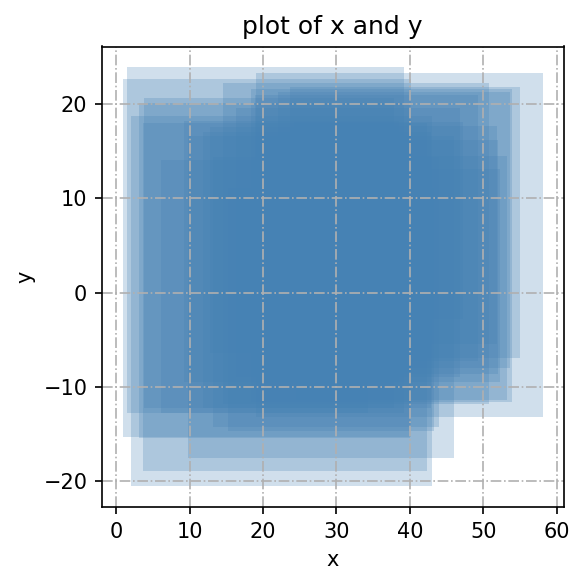

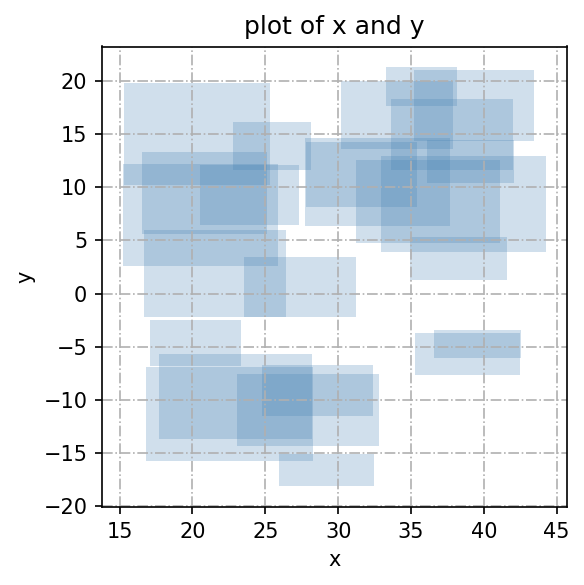

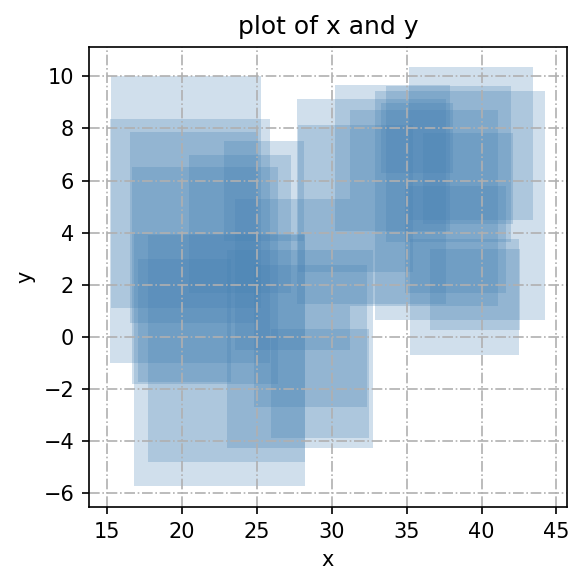

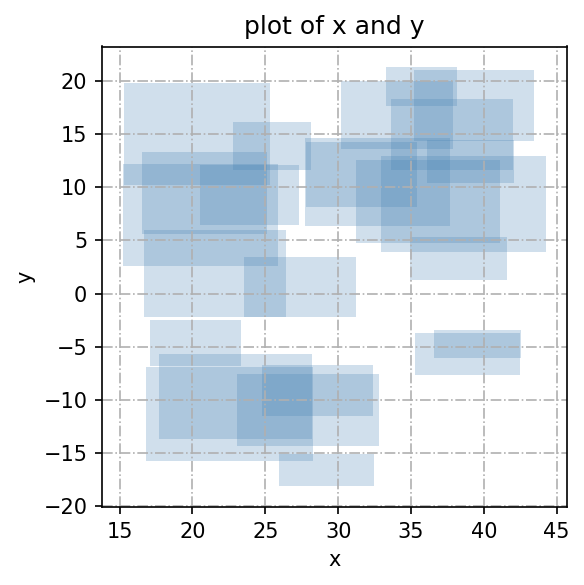

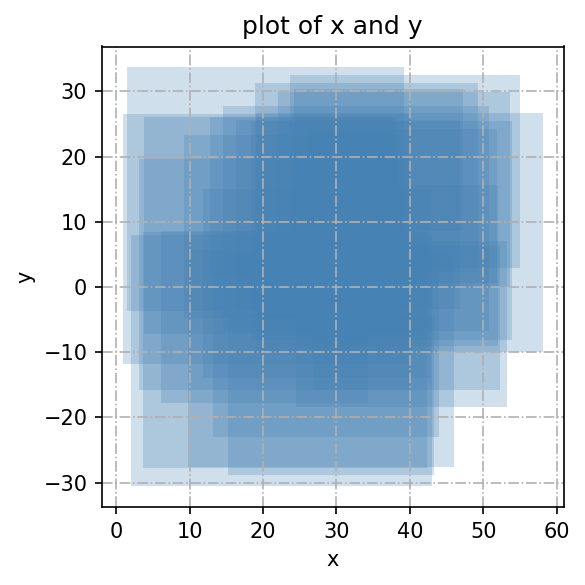

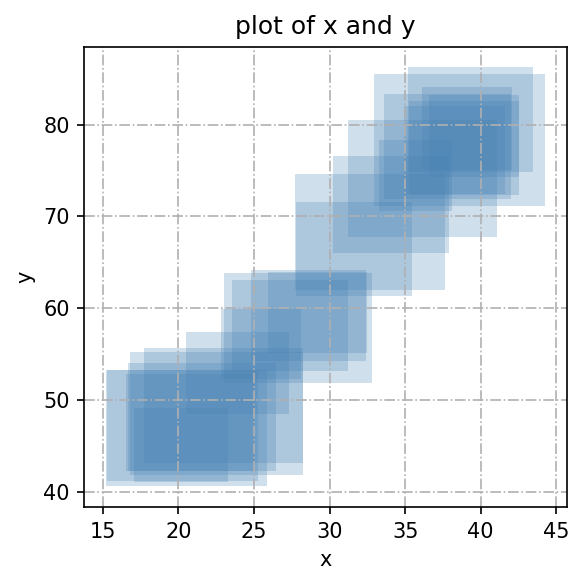

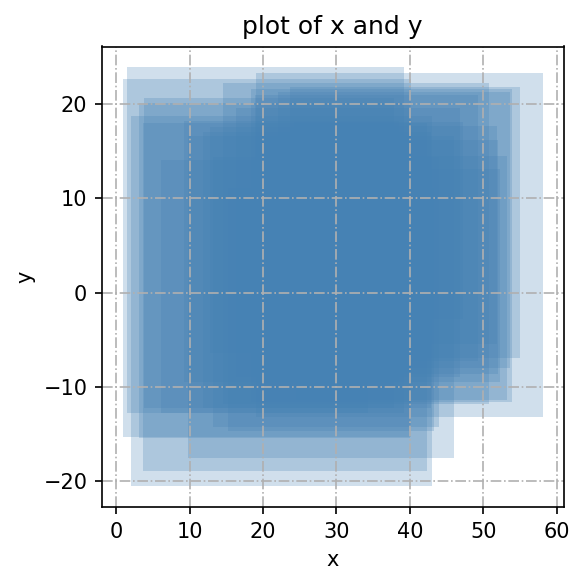

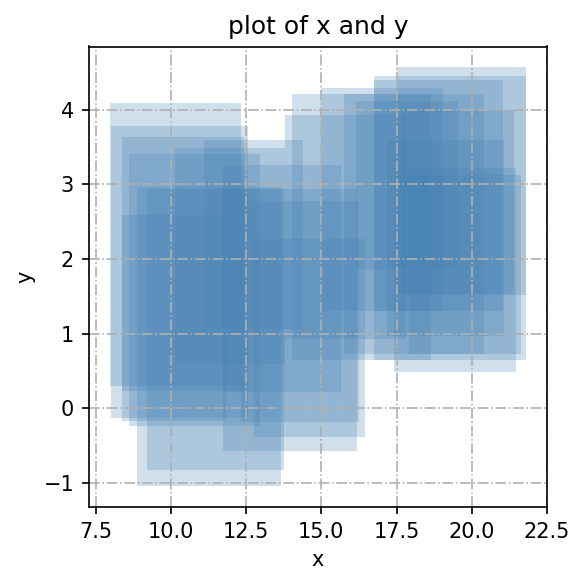

In [4]:
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2)

In [4]:
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM1.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM2.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM3.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM4.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM5.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM6.csv')
comparison2(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM7.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM8.csv')
comparison2(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, path='data/reg_result/CCRM9.csv')

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


### 非均匀分布数据模拟部分

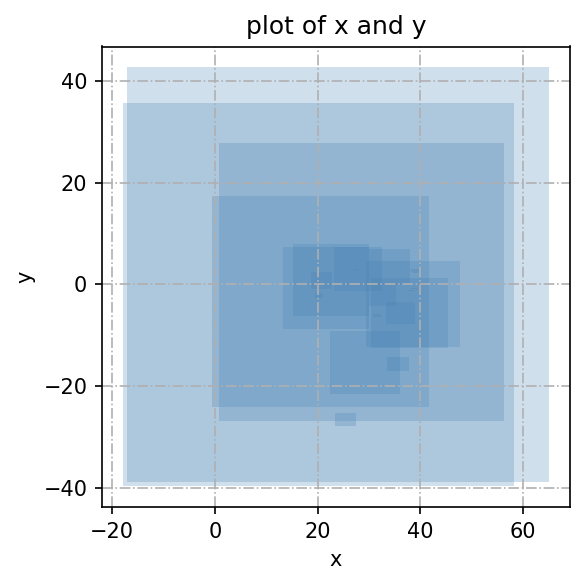

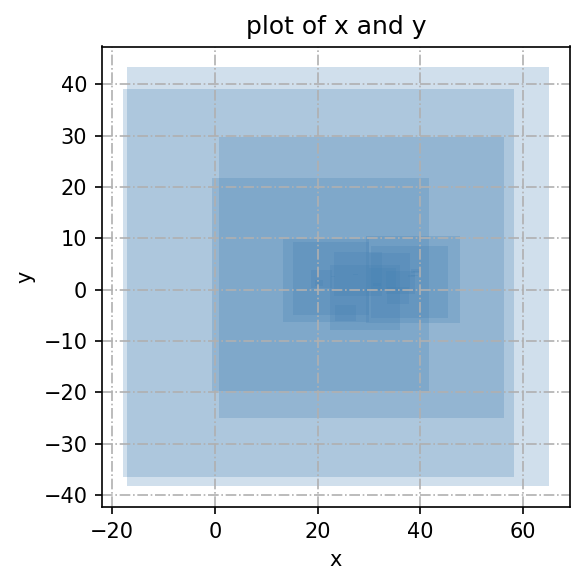

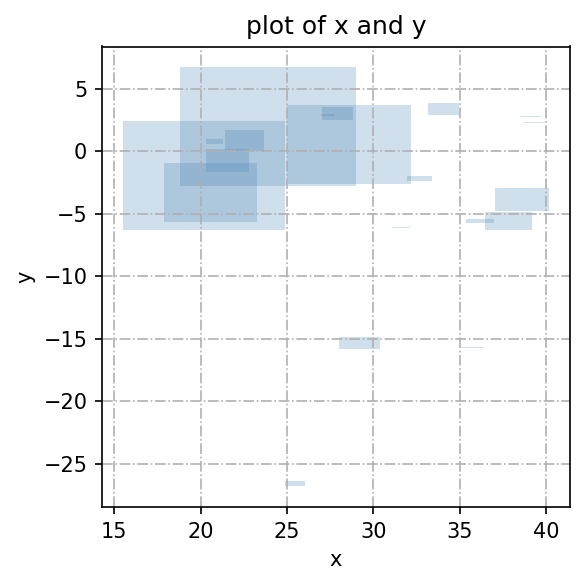

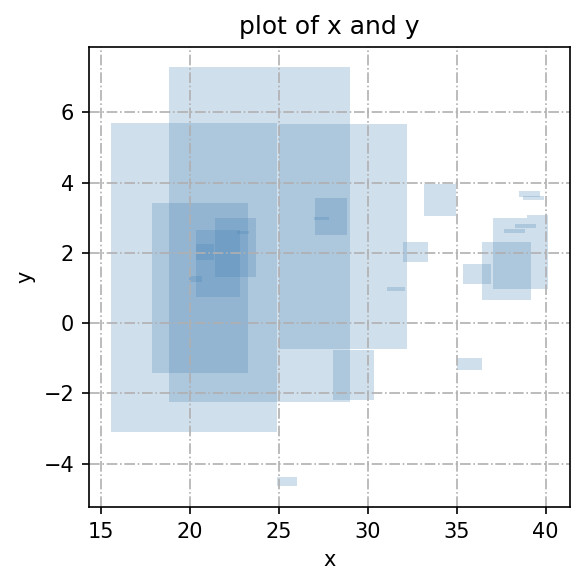

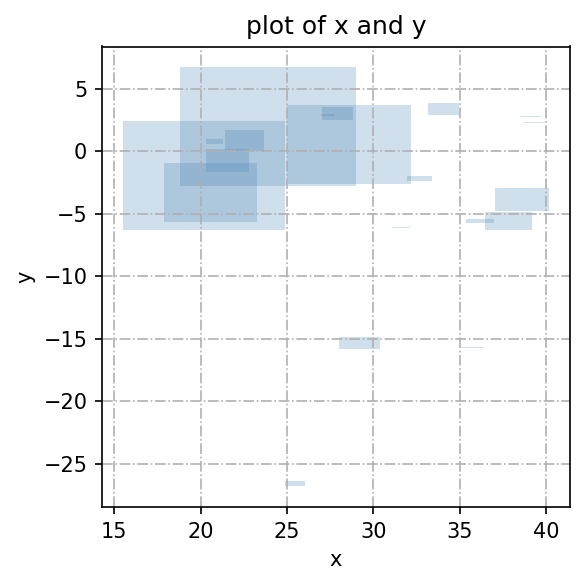

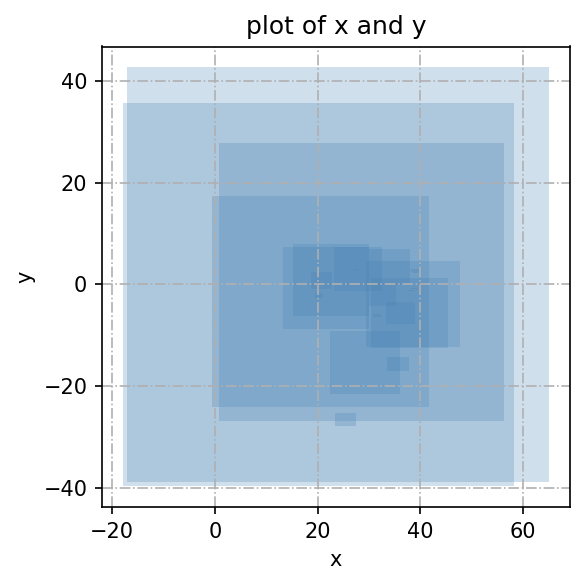

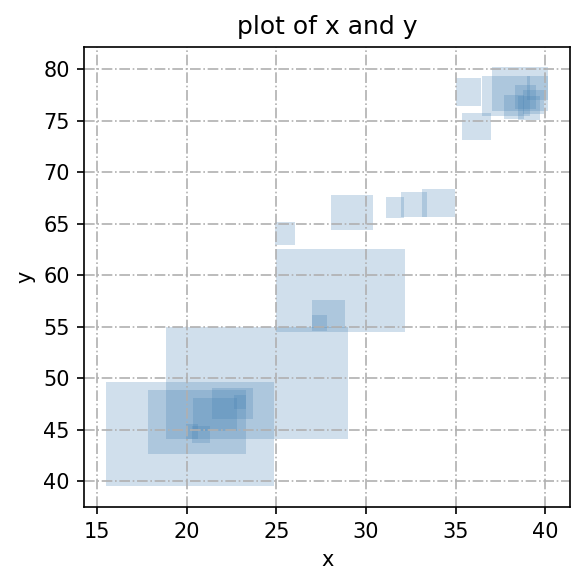

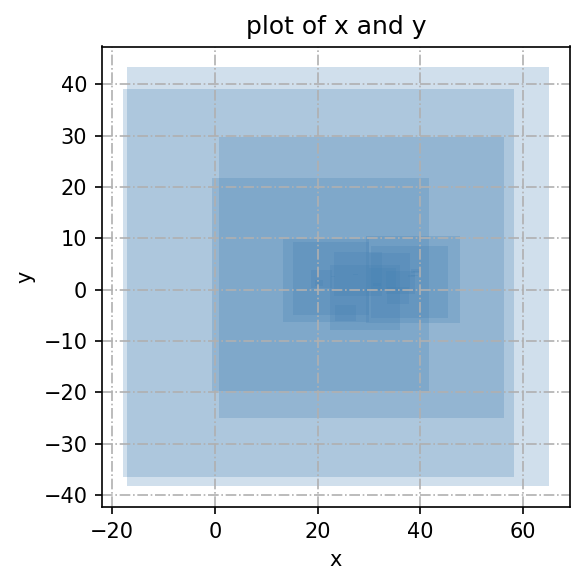

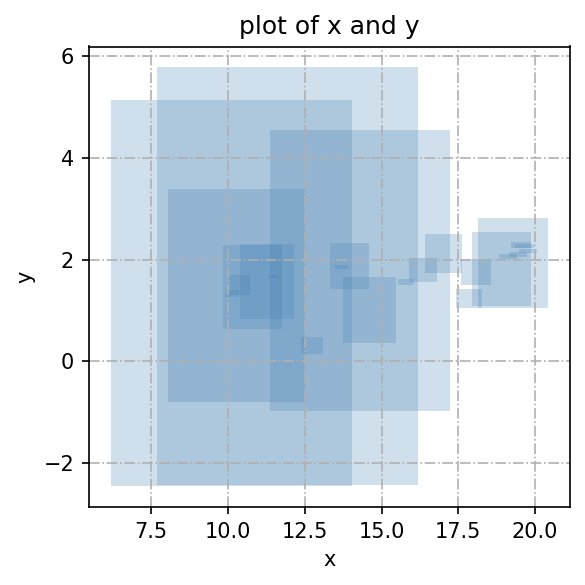

In [4]:
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, mess=True)

In [5]:
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM1.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM2.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM3.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM4.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM5.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM6.csv', mess=True)
comparison2(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM7.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM8.csv', mess=True)
comparison2(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, path='data/reg_result/mess_CCRM9.csv', mess=True)

100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


### 非线性特例数据部分

In [52]:
np.random.seed(0)
n = 100

centralx = np.linspace(1,5,n)
centraly = np.linspace(5,1,n)
centralz = np.random.normal(3, 1, n)
centralw = np.square(centralx)
centrals = np.sin(np.linspace(0,2* np.pi, n))
centralss = np.sin(np.linspace(0,2* np.pi, n) + np.pi/4)
centralsss = np.cos(np.linspace(0,2* np.pi, n) + np.pi/4)
centralc = np.cos(np.linspace(0,2* np.pi, n))
centralr = np.append(np.sqrt(25 - pow(np.linspace(1,5,n//2), 2))[::-1], np.sqrt(25 - pow(np.linspace(1,5,n//2), 2)))

mydatax = np.zeros((n, 2))
interval_lenx = abs(np.random.normal(0, 1, n))
mydatax[:, 0] = centralx - interval_lenx / 2
mydatax[:, 1] = centralx + interval_lenx / 2

### 区间长度反向
mydataxx = np.zeros((n, 2))
interval_lenxx = interval_lenx[::-1]
mydataxx[:, 0] = centralx - interval_lenxx / 2
mydataxx[:, 1] = centralx + interval_lenxx / 2

### 区间长度正排序
mydataxxx = np.zeros((n, 2))
interval_lenxxx = np.sort(interval_lenx)
mydataxxx[:, 0] = centralx - interval_lenxxx / 2
mydataxxx[:, 1] = centralx + interval_lenxxx / 2

### 区间长度逆排序
mydataxxxx = np.zeros((n, 2))
interval_lenxxxx = np.sort(interval_lenx)[::-1]
mydataxxxx[:, 0] = centralx - interval_lenxxxx / 2
mydataxxxx[:, 1] = centralx + interval_lenxxxx / 2

mydatay = np.zeros((n, 2))
interval_leny = abs(np.random.normal(0, 1, n))
mydatay[:, 0] = centraly - interval_lenx / 2
mydatay[:, 1] = centraly + interval_lenx / 2

mydatayy = np.zeros((n, 2))
interval_lenyy = np.sort(interval_lenx)[::-1]
mydatayy[:, 0] = centraly - interval_lenyy / 2
mydatayy[:, 1] = centraly + interval_lenyy / 2

mydataz = np.zeros((n, 2))
interval_lenz = abs(np.random.normal(0, 1, n))
mydataz[:, 0] = centralz - interval_lenz / 2
mydataz[:, 1] = centralz + interval_lenz / 2

mydatazz = np.zeros((n, 2))
interval_lenzz = np.sort(interval_lenx)
mydatazz[:, 0] = centralz - interval_lenzz / 2
mydatazz[:, 1] = centralz + interval_lenzz / 2

mydataw = np.zeros((n, 2))
interval_lenw = abs(np.random.normal(0, 1, n))
mydataw[:, 0] = centralw - interval_lenw / 2
mydataw[:, 1] = centralw + interval_lenw / 2

mydatas = np.zeros((n, 2))
interval_lens = abs(np.random.normal(0, 1, n))
mydatas[:, 0] = centrals - interval_lens / 2
mydatas[:, 1] = centrals + interval_lens / 2

mydatass = np.zeros((n, 2))
interval_lenss = abs(np.random.normal(0, 1, n))
mydatass[:, 0] = centralss - interval_lenss / 2
mydatass[:, 1] = centralss + interval_lenss / 2

mydatasss = np.zeros((n, 2))
interval_lensss = abs(np.random.normal(0, 1, n))
mydatasss[:, 0] = centralsss - interval_lensss / 2
mydatasss[:, 1] = centralsss + interval_lensss / 2

mydatac = np.zeros((n, 2))
interval_lenc = abs(np.random.normal(0, 1, n))
mydatac[:, 0] = centralc - interval_lenc / 2
mydatac[:, 1] = centralc + interval_lenc / 2

mydatar = np.zeros((n, 2))
interval_lenr = abs(np.random.normal(0, 1, n))
mydatar[:, 0] = centralr - interval_lenr / 2
mydatar[:, 1] = centralr + interval_lenr / 2

mydataxp = np.zeros((n, 2))
interval_lenxp = abs(np.random.normal(0, 1, n)) * 2
mydataxp[:, 0] = centralx - interval_lenxp / 2
mydataxp[:, 1] = centralx + interval_lenxp / 2

mydatawp = np.zeros((n, 2))
interval_lenwp = abs(np.random.normal(0, 1, n)) * 2
mydatawp[:, 0] = centralw - interval_lenwp / 2
mydatawp[:, 1] = centralw + interval_lenwp / 2

mydataxpp = np.zeros((n, 2))
interval_lenxpp = abs(np.random.normal(0, 1, n)) * 4
mydataxpp[:, 0] = centralx - interval_lenxpp / 2
mydataxpp[:, 1] = centralx + interval_lenxpp / 2

mydatawpp = np.zeros((n, 2))
interval_lenwpp = abs(np.random.normal(0, 1, n)) * 4
mydatawpp[:, 0] = centralw - interval_lenwpp / 2
mydatawpp[:, 1] = centralw + interval_lenwpp / 2

In [30]:
def realdata_method(xx, yy, path, niter = 20):
    """
    随机抽 2/3 进行训练, 1/3 进行.重复进行20次，计算各个指标的大小，以及指标的均值
    :param path: 返回结果的储存路径
    :param niter: 迭代次数
    :param xx: array-like(n,2).
    :param yy: array-like(n,1).
    :return: none. save result as csv
    """
    assert xx.shape[0] == yy.shape[0]
    n = xx.shape[0]
    assert n >= 8
    ntest = int(np.ceil(n/3))

    eval_HFmed = []
    eval_HFqd = []
    eval_med = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for i in tqdm(range(niter)):
        test_index = np.random.choice(n, size=ntest, replace=False).tolist()
        x_test = np.array([xx[i,:].tolist() for i in test_index])
        x = np.delete(xx, test_index, axis=0)
        y_test = np.array([yy[i,:].tolist() for i in test_index])
        y = np.delete(yy, test_index, axis=0)

        result = data_comparasion(x, y, x_test, y_test)

        eval_HFmed.append(result[0])
        eval_HFqd.append(result[1])
        eval_med.append(result[2])
        eval_HF1.append(result[3])
        eval_HF2.append(result[4])
        eval_CM.append(result[5])
        eval_CRM.append(result[6])
        eval_CCRM.append(result[7])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HFqd = [np.mean(np.array(eval_HFqd),axis=0), np.var(np.array(eval_HFqd),axis=0)]
    EV_med = [np.mean(np.array(eval_med),axis=0), np.var(np.array(eval_med),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HFqd[0][i], EV_HFqd[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_med[0][i], EV_med[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HFmed', 'HFqd', 'Med', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)

In [53]:
np.random.seed(0)
realdata_method(mydatax, mydataxxx,path='data/reg_result/mydata_x_xxx.csv')
realdata_method(mydataxxx, mydataxxxx,path='data/reg_result/mydata_xxx_xxxx.csv')
realdata_method(mydataxxx, mydatayy,path='data/reg_result/mydata_xxx_yy.csv')
realdata_method(mydatas, mydatac,path='data/reg_result/mydata_s_c.csv')
realdata_method(mydatas, mydatass,path='data/reg_result/mydata_s_ss.csv')
realdata_method(mydatas, mydatasss,path='data/reg_result/mydata_s_sss.csv')
realdata_method(mydatax, mydatac,path='data/reg_result/mydata_x_c.csv')
realdata_method(mydatax, mydatar,path='data/reg_result/mydata_x_r.csv')
realdata_method(mydatax, mydatas,path='data/reg_result/mydata_x_s.csv')
realdata_method(mydatax, mydatass,path='data/reg_result/mydata_x_ss.csv')
realdata_method(mydatax, mydatasss,path='data/reg_result/mydata_x_sss.csv')
realdata_method(mydatax, mydataw,path='data/reg_result/mydata_x_w.csv')
realdata_method(mydatax, mydatar,path='data/reg_result/mydata_x_r.csv')

  5%|▌         | 1/20 [00:00<00:03,  6.24it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\kangxinlai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 20/20 [00:05<00:00,  3.68it/s]


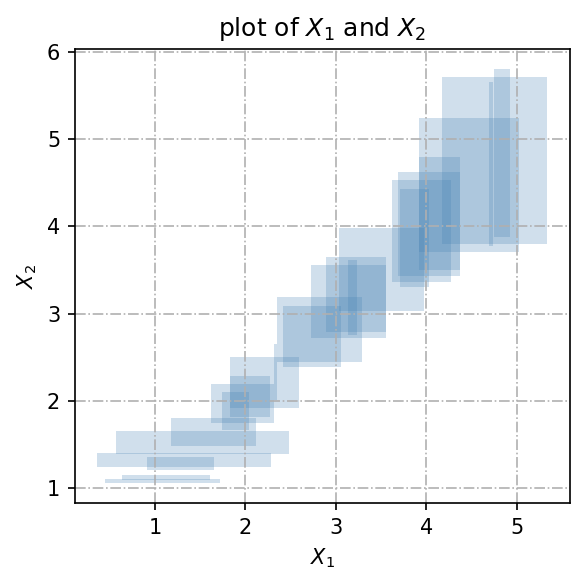

In [54]:
show3(mydatax, mydataxxx)

### 实际数据部分

In [11]:
file ="data/Iris"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4']
iris = pd.read_csv(f, sep='\s+', names=column_name)
a1 = iris['a1'].values
b1 = iris['b1'].values
a2 = iris['a2'].values
b2 = iris['b2'].values
a3 = iris['a3'].values
b3 = iris['b3'].values
a4 = iris['a4'].values
b4 = iris['b4'].values

iris_x1 = np.vstack((a1,b1)).T
iris_x2 = np.vstack((a2,b2)).T
iris_x3 = np.vstack((a3,b3)).T
iris_x4 = np.vstack((a4,b4)).T

# =================================================#
file ="data/mushroom"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'Edibility']
mushroom = pd.read_csv(f, sep='\s+', names=column_name)
a1 = mushroom['a1'].values
b1 = mushroom['b1'].values
a2 = mushroom['a2'].values
b2 = mushroom['b2'].values
a3 = mushroom['a3'].values
b3 = mushroom['b3'].values
mushroom_x1 = np.vstack((a1,b1)).T
mushroom_x2 = np.vstack((a2,b2)).T
mushroom_x3 = np.vstack((a3,b3)).T

# =================================================#
file ="data/blood pressure"
f = open(file)
column_name = ['u', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3']
blood = pd.read_csv(f, sep='\s+', names=column_name)
a1 = blood['a1'].values
b1 = blood['b1'].values
a2 = blood['a2'].values
b2 = blood['b2'].values
a3 = blood['a3'].values
b3 = blood['b3'].values
blood_x1 = np.vstack((a1,b1)).T
blood_x2 = np.vstack((a2,b2)).T
blood_x3 = np.vstack((a3,b3)).T

In [ ]:
realdata_method(mushroom_x1,mushroom_x2, path='data/reg_result/mushroom_12.csv')
realdata_method(mushroom_x1,mushroom_x3, path='data/reg_result/mushroom_13.csv')
realdata_method(mushroom_x2,mushroom_x3, path='data/reg_result/mushroom_23.csv')

realdata_method(blood_x1,blood_x2, path='data/reg_result/blood_12.csv')
realdata_method(blood_x1,blood_x3, path='data/reg_result/blood_13.csv')
realdata_method(blood_x2,blood_x3, path='data/reg_result/blood_23.csv')

realdata_method(iris_x1,iris_x2, path='data/reg_result/iris_12.csv')
realdata_method(iris_x1,iris_x3, path='data/reg_result/iris_13.csv')
realdata_method(iris_x2,iris_x3, path='data/reg_result/iris_23.csv')
realdata_method(iris_x1,iris_x4, path='data/reg_result/iris_14.csv')
realdata_method(iris_x2,iris_x4, path='data/reg_result/iris_24.csv')
realdata_method(iris_x3,iris_x4, path='data/reg_result/iris_34.csv')

##### 数据模拟实验2 更加线性的数据和特殊值

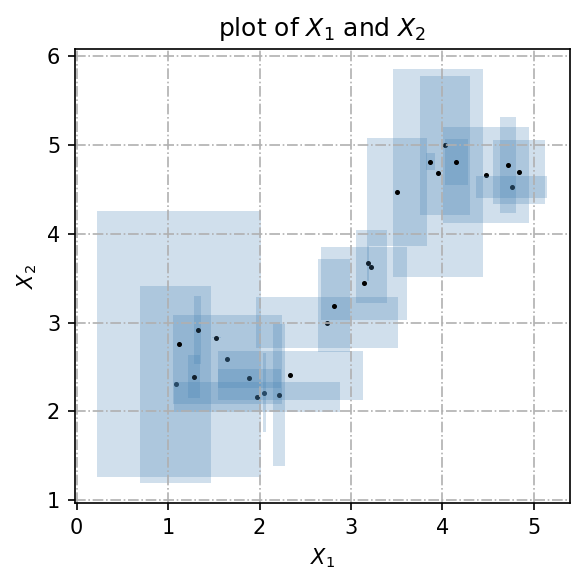

100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


In [31]:
np.random.seed(0)
n = 100

x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.4, n))
y1_c =  np.linspace(2,5,n) + 0.6 * np.sin(x_c*2) + 0.2 * np.random.normal(0, 1, n)
y1_r =  x_r + 0.6 * np.sin(x_c*2) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y1_u = y1_c + y1_r
y1_l = y1_c - y1_r

x = np.vstack((x_l, x_u)).T
y1 = np.vstack((y1_l, y1_u)).T
show3(x,y1, real=np.vstack((x_c, y1_c)).T)
realdata_method(x, y1, path='data/reg_result/data_x_y1.csv')

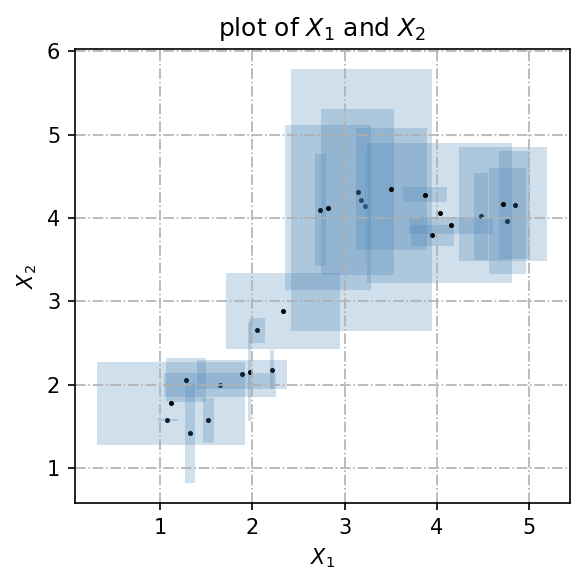

100%|██████████| 20/20 [00:04<00:00,  4.23it/s]


In [32]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.4, n))
y2_c =  np.linspace(2,5,n) + 0.6 * np.cos(x_c*2) + 0.2 * np.random.normal(0, 1, n)
y2_r =  x_r + 0.6 * np.cos(x_c*2) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y2_u = y2_c + y2_r
y2_l = y2_c - y2_r

x = np.vstack((x_l, x_u)).T
y2 = np.vstack((y2_l, y2_u)).T
show3(x,y2, real=np.vstack((x_c, y2_c)).T)
realdata_method(x, y2, path='data/reg_result/data_x_y2.csv')

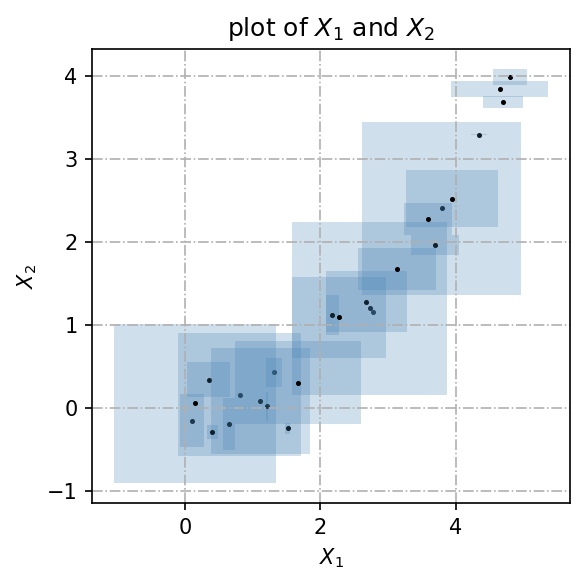

100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


In [46]:
x_c = np.linspace(0,5,n)
x_r = abs(np.random.normal(0, 0.6, n))
y3_c =  np.linspace(0,2,n) + 0.2 * pow(x_c,2) - 0.5 * x_c + 0.2 * np.random.normal(0, 1, n)
y3_r =  x_r + 0.2 * pow(x_r,2) - 0.5 * x_r + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y3_u = y3_c + y3_r
y3_l = y3_c - y3_r

x = np.vstack((x_l, x_u)).T
y3 = np.vstack((y3_l, y3_u)).T
show3(x,y3, real=np.vstack((x_c, y3_c)).T)
realdata_method(x, y3, path='data/reg_result/data_x_y3.csv')

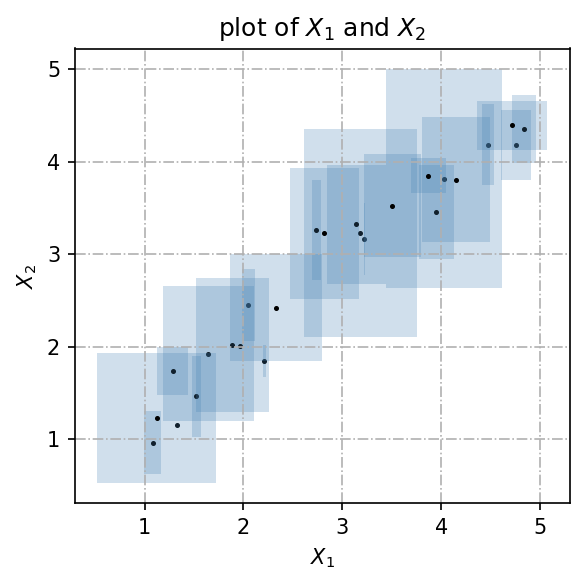

100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


In [51]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.3, n))
y4_c =  np.linspace(1,3,n) + np.log(x_c) + 0.2 * np.random.normal(0, 1, n)
y4_r =  x_r + 0.3*np.log(x_c) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y4_u = y4_c + y4_r
y4_l = y4_c - y4_r

x = np.vstack((x_l, x_u)).T
y4 = np.vstack((y4_l, y4_u)).T
show3(x,y4, real=np.vstack((x_c, y4_c)).T)
realdata_method(x, y4, path='data/reg_result/data_x_y4.csv')

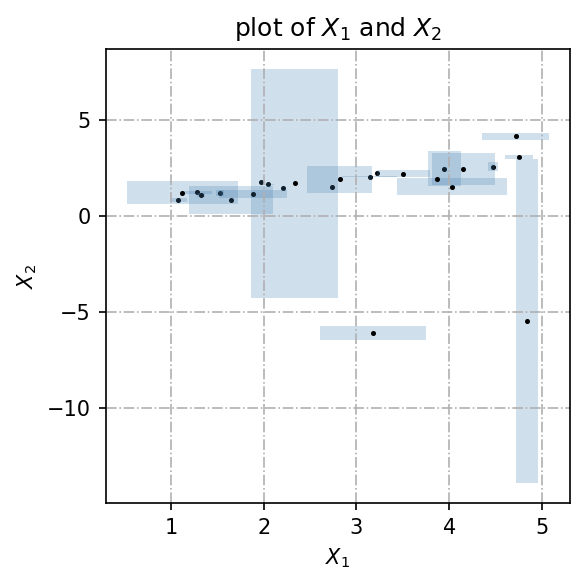

100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


In [62]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.3, n))
y5_c =  np.linspace(1,3,n) + 0.1 * np.random.standard_t(df=1, size=n) + 0.1 * np.random.normal(0, 1, n)
y5_r =  x_r + 0.1 * np.random.standard_t(df=1, size=n) + 0.1 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y5_u = y5_c + y5_r
y5_l = y5_c - y5_r

x = np.vstack((x_l, x_u)).T
y5 = np.vstack((y5_l, y5_u)).T
show3(x,y5, real=np.vstack((x_c, y5_c)).T)
realdata_method(x, y5, path='data/reg_result/data_x_y5.csv')

### outlier 实验

In [7]:
# 模拟数据的对比实验，训练集没有outsider，测试集有outsider
def beta_MSE(beta0, beta1, betahat_list):
    mse = [pow(betahat_list[0][0]-beta1, 2), pow(betahat_list[0][1] - beta0, 2), pow(betahat_list[0][2] - beta1, 2), pow(betahat_list[0][3] - beta0, 2),
           pow(betahat_list[1][0]-beta1, 2), pow(betahat_list[1][1] - beta0, 2), pow(betahat_list[1][2] - beta1, 2), pow(betahat_list[1][3] - beta0, 2),
           pow(betahat_list[2][0]-beta1, 2), pow(betahat_list[2][1] - beta0, 2), pow(betahat_list[2][2] - beta1, 2), pow(betahat_list[2][3] - beta0, 2),
           pow(betahat_list[3][0]-beta1, 2), pow(betahat_list[3][1] - beta0, 2), pow(betahat_list[3][2] - beta1, 2), pow(betahat_list[3][3] - beta0, 2),
           pow(betahat_list[4][0][0][0]-beta0, 2), pow(betahat_list[4][0][1][0]-beta1, 2),
           pow(betahat_list[5][0][0][0]-beta0, 2), pow(betahat_list[5][0][1][0]-beta1, 2), pow(betahat_list[5][1][0][0]-beta0, 2), pow(betahat_list[5][1][1][0]-beta1, 2),
           pow(betahat_list[6][0][0][0]-beta0, 2), pow(betahat_list[6][0][1][0]-beta1, 2), pow(betahat_list[6][1][0][0]-beta0, 2), pow(betahat_list[6][1][1][0]-beta1, 2)
           ]
    return mse


def comparison_outlier(a, b, c, d, e, f, g, h, i, j, k, l, m, o, alpha, path, betahat_detail=False, ntrain = 250):
    eval_HFmed = []
    eval_HFqd = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []
    betahat = []
    beta_mse = []

    for iter in tqdm(range(100)):

        train, test, beta0, beta1, betastar = data_generation_outlier(ntrain, a, b, c, d, e, f, g, h, i, j, k, l, m, o, iter, alpha)
        x, y, x_test, y_test = trans_to_datakxl(train, test)
        print(x.shape[0])

        result, betahat_list = data_comparasion(x, y, x_test, y_test, betahat_detail=betahat_detail)

        beta_mse.append(beta_MSE(beta0, beta1, betahat_list))

        betahat.append(betahat_list)
        eval_HFmed.append(result[0])
        eval_HFqd.append(result[1])
        eval_HF1.append(result[2])
        eval_HF2.append(result[3])
        eval_CM.append(result[4])
        eval_CRM.append(result[5])
        eval_CCRM.append(result[6])

    MSE = np.mean(np.array(beta_mse),axis=0)
    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HFqd = [np.mean(np.array(eval_HFqd),axis=0), np.var(np.array(eval_HFqd),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HFqd[0][i], EV_HFqd[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HFmed', 'HFqd', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)
    # print('betahat:')
    # print(betahat[0])
    print("MSE: ")
    print("beta1_c_hfmed, beta0_c_hfmed, beta1_r_hfmed, beta0_r_hfmed: ")
    print(MSE[0:4])
    print("beta1_c_hfqd, beta0_c_hfqd, beta1_r_hfqd, beta0_r_hfqd: ")
    print(MSE[4:8])
    print("beta1_c_hf1, beta0_c_hf1, beta1_r_hf1, beta0_r_hf1: ")
    print(MSE[8:12])
    print("beta1_c_hf2, beta0_c_hf2, beta1_r_hf2, beta0_r_hf2: ")
    print(MSE[12:16])
    print("beta0_c_r_CM, beta1_c_r_CM")
    print(MSE[16:18])
    print("beta0_c_CRM, beta1_c_CRM, beta0_r_CRM, beta1_r_CRM: ")
    print(MSE[18:22])
    print("beta0_c_CCRM, beta1_c_CCRM, beta0_r_CCRM, beta1_r_CCRM: ")
    print(MSE[22:26])



def plot_simu_data(a, b, c, d, e, f, g, h, i, j, k, l, m, o, alpha):
    train, test, beta0, beta1, betastar = data_generation_outlier(375, a, b, c, d, e, f, g, h, i, j, k, l, m, o, 0, alpha)
    x, y, x_test, y_test = trans_to_datakxl(train, test)
    show3(x,y,varname=["x", "y"], samples=50)

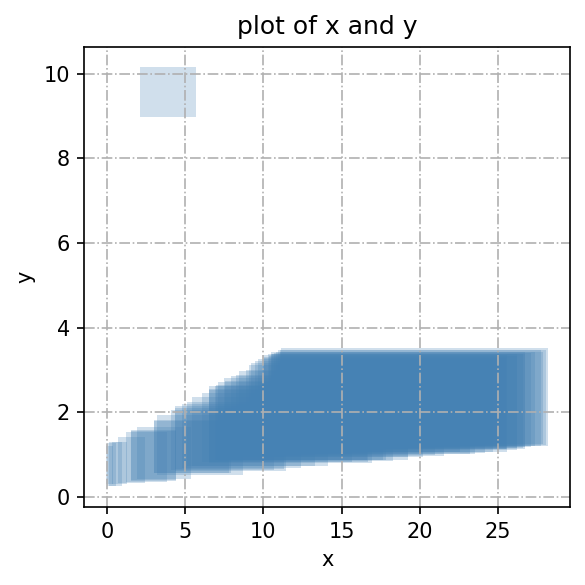

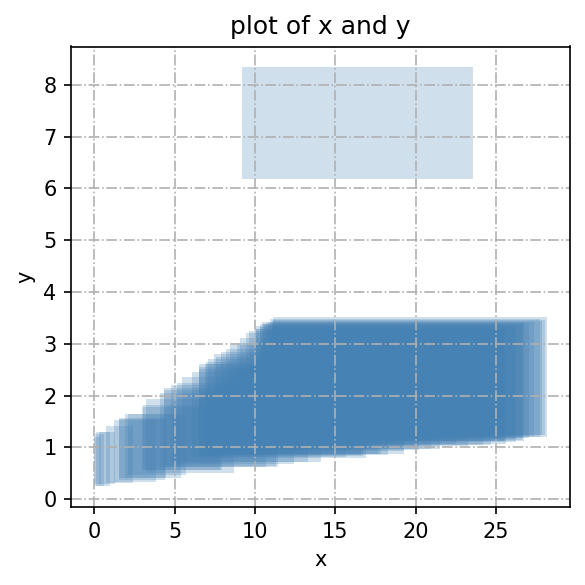

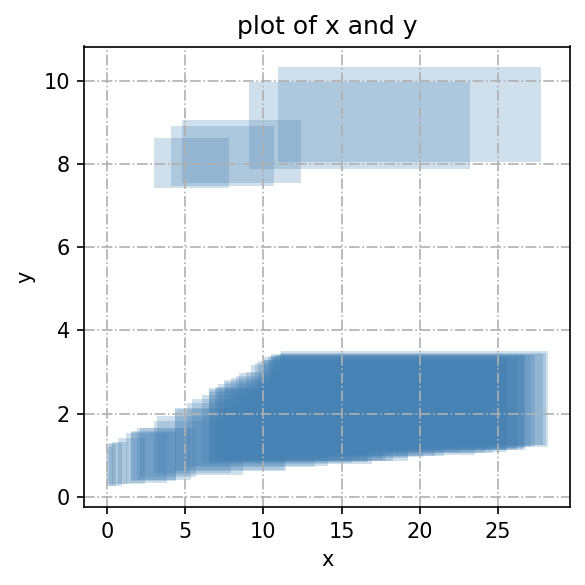

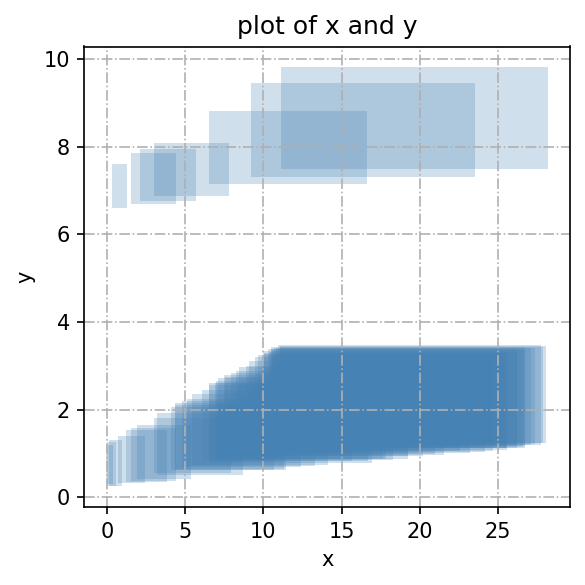

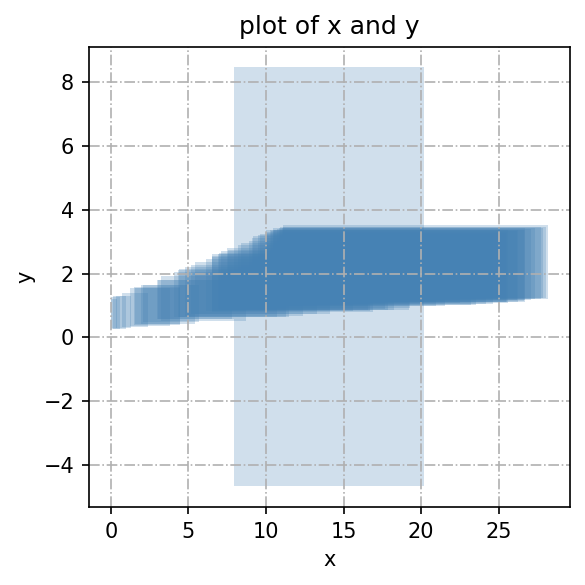

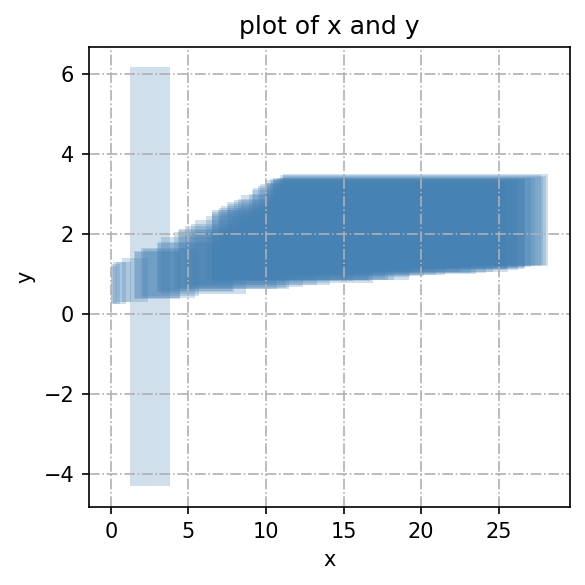

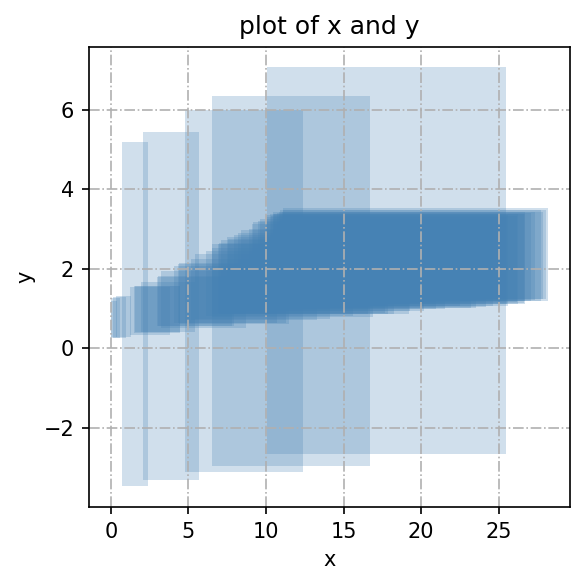

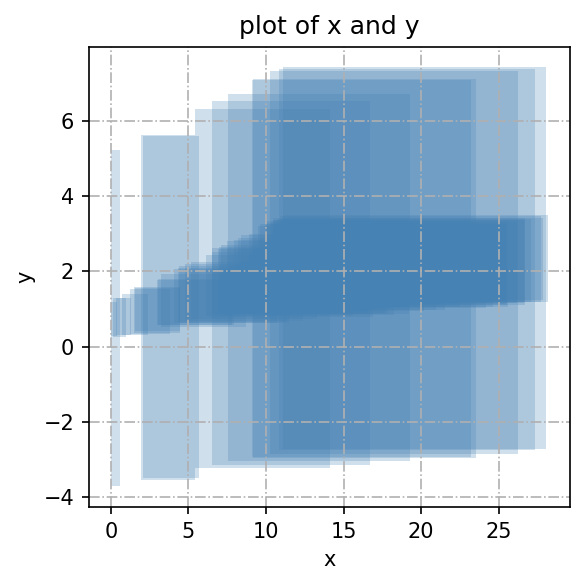

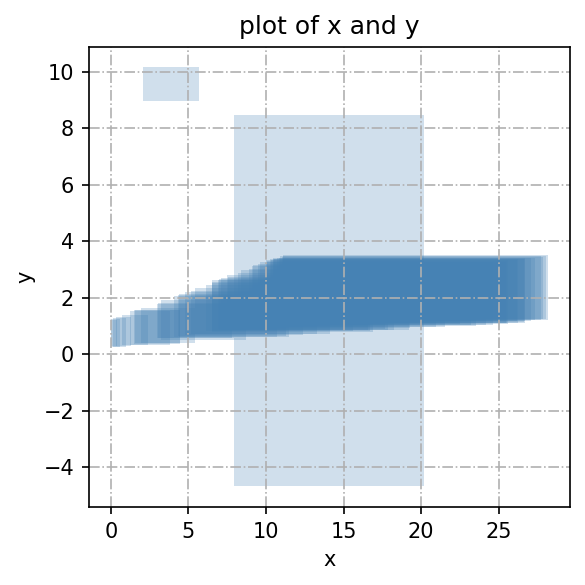

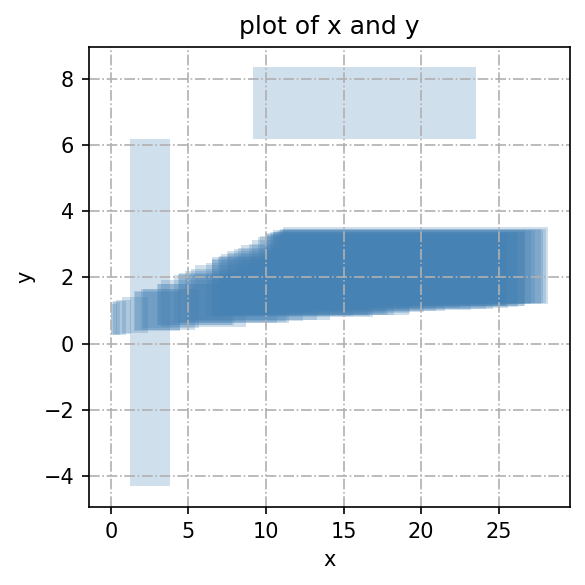

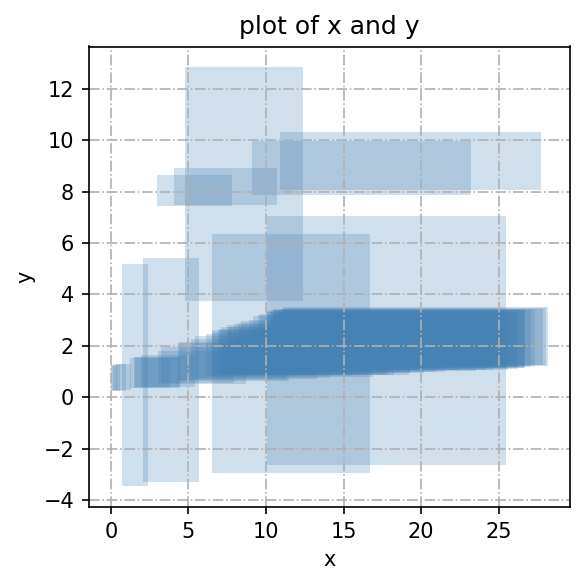

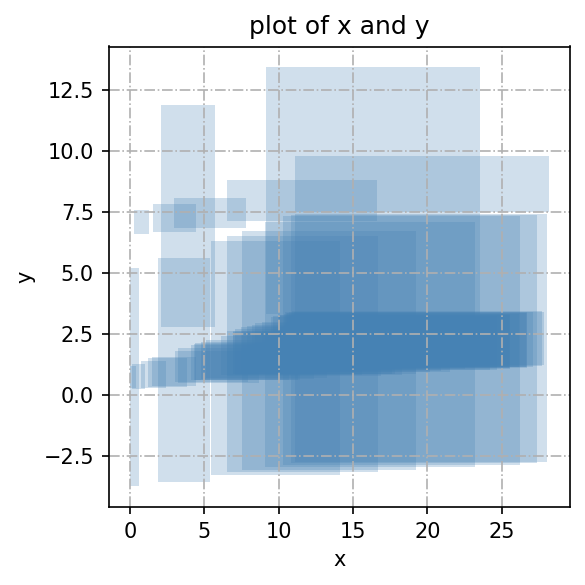

In [9]:
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 0, 0, alpha=0.02)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 0, 0, alpha=0.05)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 0, 0, alpha=0.1)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 0, 0, alpha=0.2)

plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 0, 0, 3, 6, alpha=0.02)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 0, 0, 3, 6, alpha=0.05)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 0, 0, 3, 6, alpha=0.1)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 0, 0, 3, 6, alpha=0.2)

plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 3, 6, alpha=0.02)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 3, 6, alpha=0.05)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 3, 6, alpha=0.1)
plot_simu_data(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, 5, 10, 3, 6, alpha=0.2)

In [6]:
comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 5, 10, 0, 0, alpha=0.02, path='data/reg_result/outsider1.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 5, 10, 0, 0, alpha=0.05, path='data/reg_result/outsider2.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 5, 10, 0, 0, alpha=0.1, path='data/reg_result/outsider3.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 5, 10, 0, 0, alpha=0.2, path='data/reg_result/outsider4.csv')

comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 0, 0, 3, 6, alpha=0.02, path='data/reg_result/outsider5.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 0.5, 1, 0.1, 0.2, 0, 0, 3, 6, alpha=0.05, path='data/reg_result/outsider6.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 0, 0, 3, 6, alpha=0.1, path='data/reg_result/outsider7.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 0, 0, 3, 6, alpha=0.2, path='data/reg_result/outsider8.csv')

comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.02, path='data/reg_result/outsider9.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.05, path='data/reg_result/outsider10.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.1, path='data/reg_result/outsider11.csv')
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.2, path='data/reg_result/outsider12.csv')

  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286584374473016, 0.7305020632758037, 0.08241383882678747, 0.7864277793119635], [0.07662227463622531, 0.944036301992701, 0.08401306282123325, 0.7801287447263069], [0.08286511341044336, 0.7305163898270003, 0.08241390556390175, 0.7864215376024384], [0.07661716203353483, 0.9440695033409706, 0.08401312643877559, 0.7801268977791157], [array([[0.96316494],
       [0.07700824]])], [array([[0.96316494],
       [0.07700824]]), array([[0.78293691],
       [0.08255877]])], [array([[0.96316494],
       [0.07700824]]), array([[0.78293691],
       [0.08255877]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08287966917680444, 0.7305600448123505, 0.08241383804408227, 0.786427792408664], [0.0743446836631665, 1.0500205421874527, 0.08250653642602965, 0.7838426286049526], [0.0828802569071645, 0.730546380877038, 0.08242360892717163, 0.786264170451421], [0.07435772419543993, 1.0499004284694347, 0.08250626454825313, 0.7838396053591152], [array([[1.06822744],
       [0.07448377]])], [array([[1.06822744],
       [0.07448377]]), array([[0.78293691],
       [0.08255877]])], [array([[1.06822744],
       [0.07448377]]), array([[0.78293691],
       [0.08255877]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08289839878739773, 0.7305435986318393, 0.0824138379132384, 0.786427794347856], [0.0927154654782774, 1.2918065872567601, 0.08313354485385593, 0.7812990091661708], [0.08289782447613708, 0.7305408323604217, 0.08243268454587459, 0.7861120191948447], [0.09257173386574993, 1.2929089688152384, 0.08313140514835296, 0.7813117823409695], [array([[1.30955924],
       [0.09273012]])], [array([[1.30955924],
       [0.09273012]]), array([[0.78293691],
       [0.08255877]])], [array([[1.30955924],
       [0.09273012]]), array([[0.78293691],
       [0.08255877]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286328102774256, 0.7313424584263631, 0.08241383788834519, 0.7864277947320526], [0.06102264075369121, 2.2103497568229207, 0.08246477011284498, 0.7881714429103606], [0.08286418874790483, 0.7313342060473217, 0.08242389178548158, 0.7862881812367369], [0.061050256417024495, 2.209989306954191, 0.08246462938565756, 0.7881739787408394], [array([[2.22231188],
       [0.0612194 ]])], [array([[2.22231188],
       [0.0612194 ]]), array([[0.78293691],
       [0.08255877]])], [array([[2.22231188],
       [0.0612194 ]]), array([[0.78293691],
       [0.08255877]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.0828650648750894, 0.7304893849224348, 0.0822876514215269, 0.7887222745873153], [0.08302760499560725, 0.7291632572365878, 0.07667900334613302, 0.9491330668017429], [0.08286520982578353, 0.7304972884257495, 0.08228661864245096, 0.7887487793989376], [0.0830278062187387, 0.7291638191364056, 0.07671292396185242, 0.9487503024073927], [array([[0.73037706],
       [0.08285331]])], [array([[0.73037706],
       [0.08285331]]), array([[0.95099366],
       [0.07673367]])], [array([[0.73037706],
       [0.08285331]]), array([[0.95099366],
       [0.07673367]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286506476659469, 0.7304893870385467, 0.08219479331657824, 0.7904513250669588], [0.08298776412728372, 0.729103623936162, 0.06491764537824098, 1.172310835967655], [0.08286645044238028, 0.7304553063676257, 0.08217790885284831, 0.7907344681595765], [0.08298769327752643, 0.7291034612380792, 0.0649194836750889, 1.1723403136857289], [array([[0.73037706],
       [0.08285331]])], [array([[0.73037706],
       [0.08285331]]), array([[1.1739817 ],
       [0.06495996]])], [array([[0.73037706],
       [0.08285331]]), array([[1.1739817 ],
       [0.06495996]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286506469205294, 0.7304893881512713, 0.08248712184440359, 1.4355470899394749], [0.08293383269515123, 0.7299325234949773, 0.0756994414933837, 1.9338232661047277], [0.08286578143077669, 0.7304848323273441, 0.08247907102286005, 1.435791745999604], [0.08292645988474967, 0.7300318237824183, 0.07570113178583823, 1.9337991887829955], [array([[0.73037706],
       [0.08285331]])], [array([[0.73037706],
       [0.08285331]]), array([[1.93534181],
       [0.07571807]])], [array([[0.73037706],
       [0.08285331]]), array([[1.93534181],
       [0.07571807]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286506478161788, 0.7304893871096406, 0.0826442093506741, 1.4366683090521315], [0.08285787191489331, 0.7305338271984068, 0.09337948122637058, 2.015056472887914], [0.08286577431830447, 0.7304756800199059, 0.08264285177300251, 1.4367102067653947], [0.08285785543767057, 0.7305341521387406, 0.09338530860403776, 2.0149424485766327], [array([[0.73037706],
       [0.08285331]])], [array([[0.73037706],
       [0.08285331]]), array([[2.01672725],
       [0.09336325]])], [array([[0.73037706],
       [0.08285331]]), array([[2.01672725],
       [0.09336325]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08286584427008857, 0.7305020585482852, 0.08256573593722266, 1.4300524242796258], [0.08073666954275571, 0.7810826383882437, 0.08431461758597639, 1.4174118389458041], [0.0828683608436645, 0.7305218497149026, 0.08256723734683019, 1.4300552888441116], [0.08059033774018658, 0.7826200420934322, 0.08431459177207218, 1.417412769989584], [array([[0.96316494],
       [0.07700824]])], [array([[0.96316494],
       [0.07700824]]), array([[1.59245065],
       [0.07978558]])], [array([[0.96316494],
       [0.07700824]]), array([[1.59245065],
       [0.07978558]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08287966937958136, 0.7305600406395156, 0.08243233358602037, 1.4346767092862869], [0.08597472819244106, 0.7298179208233854, 0.07635517144950252, 1.6307445809133412], [0.08288011559095407, 0.7305573450787994, 0.08245425259290445, 1.4341161982180055], [0.08599794177275755, 0.7294853674635011, 0.07634158704974728, 1.6310898249044368], [array([[1.06822744],
       [0.07448377]])], [array([[1.06822744],
       [0.07448377]]), array([[1.8144073 ],
       [0.07390628]])], [array([[1.06822744],
       [0.07448377]]), array([[1.8144073 ],
       [0.07390628]])]]


  0%|          | 0/100 [00:00<?, ?it/s]

betahat:
[[0.08289839872882131, 0.7305435997395252, 0.08248712271483714, 1.4355470644387165], [0.09412307409140844, 0.9871325546195538, 0.08173944739433965, 1.468249844721616], [0.08289843446132135, 0.7305508129319773, 0.08244442864654357, 1.4363887682060512], [0.0941127305074721, 0.9873918619800326, 0.08175678431494407, 1.467644803295818], [array([[1.30955924],
       [0.09273012]])], [array([[1.30955924],
       [0.09273012]]), array([[1.93534181],
       [0.07571807]])], [array([[1.30955924],
       [0.09273012]]), array([[1.93534181],
       [0.07571807]])]]


100%|██████████| 100/100 [02:08<00:00,  1.29s/it]

betahat:
[[0.08286328102335007, 0.7313424583253133, 0.08264421115353203, 1.4366682548175491], [0.05101995165764615, 1.8892748927520246, 0.08580249420671943, 1.438369762152371], [0.08286077426288486, 0.7313778580671123, 0.08264605619791622, 1.4366158359169803], [0.0510201279378464, 1.889347193861696, 0.08580329679021084, 1.43836337597537], [array([[2.22231188],
       [0.0612194 ]])], [array([[2.22231188],
       [0.0612194 ]]), array([[2.01672725],
       [0.09336325]])], [array([[2.22231188],
       [0.0612194 ]]), array([[2.01672725],
       [0.09336325]])]]


In [4]:
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.1, path='data/reg_result/mse100.csv',betahat_detail=True, ntrain=100)

100%|██████████| 100/100 [00:40<00:00,  2.46it/s]

MSE: 
beta1_c_hfmed, beta0_c_hfmed, beta1_r_hfmed, beta0_r_hfmed: 
[1.00391192e-08 3.46266420e-05 1.19638046e-07 1.73599495e-01]
beta1_c_hfqd, beta0_c_hfqd, beta1_r_hfqd, beta0_r_hfqd: 
[1.26859645e-03 3.62387337e-01 2.65488674e-05 1.96983148e-01]
beta1_c_hf1, beta0_c_hf1, beta1_r_hf1, beta0_r_hf1: 
[6.73179061e-06 1.54048893e-03 4.21009366e-07 1.73752491e-01]
beta1_c_hf2, beta0_c_hf2, beta1_r_hf2, beta0_r_hf2: 
[1.28147107e-03 3.82722700e-01 3.05166288e-05 1.97892635e-01]
beta1_c_r_CM, beta0_c_r_CM
[0.79407385 0.00147396]
beta0_c_CRM, beta1_c_CRM, beta0_r_CRM, beta1_r_CRM: 
[7.94073855e-01 1.47395589e-03 7.37152882e-01 3.19557929e-04]
beta0_c_CCRM, beta1_c_CCRM, beta0_r_CCRM, beta1_r_CCRM: 
[7.94073855e-01 1.47395589e-03 7.37152882e-01 3.19557929e-04]


In [5]:
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.1, path='data/reg_result/mse100.csv',betahat_detail=True, ntrain=500)

100%|██████████| 100/100 [07:11<00:00,  4.31s/it]

MSE: 
beta1_c_hfmed, beta0_c_hfmed, beta1_r_hfmed, beta0_r_hfmed: 
[2.45795278e-09 3.15238527e-05 1.97443663e-08 1.73517559e-01]
beta1_c_hfqd, beta0_c_hfqd, beta1_r_hfqd, beta0_r_hfqd: 
[4.39444376e-04 1.94560175e-01 7.08681815e-06 1.97607330e-01]
beta1_c_hf1, beta0_c_hf1, beta1_r_hf1, beta0_r_hf1: 
[2.47799256e-09 3.16109858e-05 1.99884209e-08 1.73514924e-01]
beta1_c_hf2, beta0_c_hf2, beta1_r_hf2, beta0_r_hf2: 
[4.39403995e-04 1.94517710e-01 7.10841284e-06 1.97637972e-01]
beta1_c_r_CM, beta0_c_r_CM
[5.84109266e-01 3.24659410e-04]
beta0_c_CRM, beta1_c_CRM, beta0_r_CRM, beta1_r_CRM: 
[5.84109266e-01 3.24659410e-04 7.08705357e-01 4.66560837e-05]
beta0_c_CCRM, beta1_c_CCRM, beta0_r_CCRM, beta1_r_CCRM: 
[5.84109266e-01 3.24659410e-04 7.08705357e-01 4.66560837e-05]


In [6]:
comparison_outlier(0, 20, 0, 1, 0, 0.01, 1, 2, 0.1, 0.2, 5, 10, 3, 6, alpha=0.1, path='data/reg_result/mse100.csv',betahat_detail=True, ntrain=1000)

100%|██████████| 100/100 [37:05<00:00, 22.25s/it]

MSE: 
beta1_c_hfmed, beta0_c_hfmed, beta1_r_hfmed, beta0_r_hfmed: 
[8.34793654e-10 3.04309193e-05 1.58795348e-08 1.83552816e-01]
beta1_c_hfqd, beta0_c_hfqd, beta1_r_hfqd, beta0_r_hfqd: 
[2.09470883e-04 1.83343544e-01 3.89563631e-06 2.06054890e-01]
beta1_c_hf1, beta0_c_hf1, beta1_r_hf1, beta0_r_hf1: 
[8.14246772e-10 3.04430346e-05 1.58879361e-08 1.83551386e-01]
beta1_c_hf2, beta0_c_hf2, beta1_r_hf2, beta0_r_hf2: 
[2.09442067e-04 1.83357131e-01 3.89359482e-06 2.06060917e-01]
beta1_c_r_CM, beta0_c_r_CM
[5.83512289e-01 1.51629096e-04]
beta0_c_CRM, beta1_c_CRM, beta0_r_CRM, beta1_r_CRM: 
[5.83512289e-01 1.51629096e-04 7.06041334e-01 2.06969333e-05]
beta0_c_CCRM, beta1_c_CCRM, beta0_r_CCRM, beta1_r_CCRM: 
[5.83512289e-01 1.51629096e-04 7.06041334e-01 2.06969333e-05]


### More on oulier

In [ ]:
# Outlier Settings
# 1. fixed X with fixed small Y
# 2. fixed X with fixed large Y
# 3. X ~ U[0,1], Y ~ U[0,1]
# 4. heavy-tailed noise

In [46]:
def reg_rsme_plot(x, y, path=False):
    """
    :param x: array-like
    :param y: list of array-like
    :param yname: list
    :param path: string
    :return:
    """
    evallist = ['RMSEL', 'RMSEU', 'RMSEC', 'RMSER']
    outlier = ['Central_Outlier', 'Radius_Outlier', 'Central_Radius_Outlier']
    method_list = ['HFmed', 'HFqd', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM']
    color_list = ['darkorange', 'purple', 'darkorange', 'purple', 'limegreen', 'red', 'steelblue']
    ls_list = ['solid', 'solid', '-.', '-.', ':', ':', ':']
    alpha_list = x

    fig, axes = plt.subplots(3, 4, figsize=(12,9), dpi=120)

    for i in range(3):
        for j in range(4):
            for k in range(7):
                axes[i, j].plot(alpha_list, y[i][j][k], lw=2, label=method_list[k], color=color_list[k], ls=ls_list[k], alpha=0.6)

            axes[i, j].grid(True, ls='-.')

            if i == 2:
                axes[i, j].set_xlabel(evallist[j])
            if j == 0:
                axes[i, j].set_ylabel(outlier[i])

            if i==0 and j ==3:
                axes[i, j].legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


def comparison_outlier2(a, b, c, d, e, f, g, h, i, j, path=None, betahat_detail=False, ntrain = 200, datasets=1):
    ## return [outlier[alpha[method[eval]]]] => [outlier[eval[method[alpha]]]]
    outlier = ['Central_Outlier', 'Radius_Outlier', 'Central_Radius_Outlier']
    alpha_list = np.linspace(0.01,0.2,10)

    result0 = []
    for out in outlier:
        result11 = []
        for alpha in alpha_list:
            eval_HFmed = []
            eval_HFqd = []
            eval_HF1 = []
            eval_HF2 = []
            eval_CM = []
            eval_CRM = []
            eval_CCRM = []
            for iter in tqdm(range(50)):
                if datasets == 1:
                    train, test, _, _, _ = data_generation_outlier1(ntrain, a, b, c, d, e, f, g, h, i, j, iter, alpha, outlier=out)
                elif datasets ==2:
                    train, test, _, _, _ = data_generation_outlier2(ntrain, a, b, c, d, e, f, g, h, i, j, iter, alpha, outlier=out)
                elif datasets ==3:
                    train, test, _, _, _ = data_generation_outlier3(ntrain, a, b, c, d, e, f, g, h, i, j, iter, alpha, outlier=out)
                elif datasets ==4:
                    train, test, _, _, _ = data_generation_outlier4(ntrain, a, b, c, d, e, f, g, h, i, j, iter, alpha, outlier=out)
                x, y, x_test, y_test = trans_to_datakxl(train, test)

                result, _ = data_comparasion(x, y, x_test, y_test, betahat_detail=betahat_detail, evallist=['RMSE'])

                eval_HFmed.append(result[0])
                eval_HFqd.append(result[1])
                eval_HF1.append(result[2])
                eval_HF2.append(result[3])
                eval_CM.append(result[4])
                eval_CRM.append(result[5])
                eval_CCRM.append(result[6])

            result11.append([np.mean(np.array(eval_HFmed),axis=0),
            np.mean(np.array(eval_HFqd),axis=0),
            np.mean(np.array(eval_HF1),axis=0),
            np.mean(np.array(eval_HF2),axis=0),
            np.mean(np.array(eval_CM),axis=0),
            np.mean(np.array(eval_CRM),axis=0),
            np.mean(np.array(eval_CCRM),axis=0)])

        result0.append(result11)

    # print(result0)
    # print(len(result0))
    # print(len(result0[0]))
    # print(len(result0[0][0]))
    # print(len(result0[0][0][0]))
    # # print(len(result0[0][0][0][0]))

    l = []
    for s in range(3):
        l1 = []
        for t in range(4):
            l2 = []
            for p in range(7):
                l3 = []
                for q in range(len(alpha_list)):
                    l3.append(result0[s][q][p][t])
                l2.append(l3)
            l1.append(l2)
        l.append(l1)
    if path:
        ll=np.array(l)
        np.save(path, ll)
    return l


def plot_simu_data2(a, b, c, d, e, f, g, h, i, j, alpha, datasets=1, out='Central'):
    if datasets == 1:
        train, test, _, _, _ = data_generation_outlier1(200, a, b, c, d, e, f, g, h, i, j, 0, alpha, outlier=out)
    elif datasets ==2:
        train, test, _, _, _ = data_generation_outlier2(200, a, b, c, d, e, f, g, h, i, j, 0, alpha, outlier=out)
    elif datasets ==3:
        train, test, _, _, _ = data_generation_outlier3(200, a, b, c, d, e, f, g, h, i, j, 0, alpha, outlier=out)
    elif datasets ==4:
        train, test, _, _, _ = data_generation_outlier4(200, a, b, c, d, e, f, g, h, i, j, 0, alpha, outlier=out)
    x, y, x_test, y_test = trans_to_datakxl(train, test)
    show3(x,y,varname=["x", "y"], samples=50)

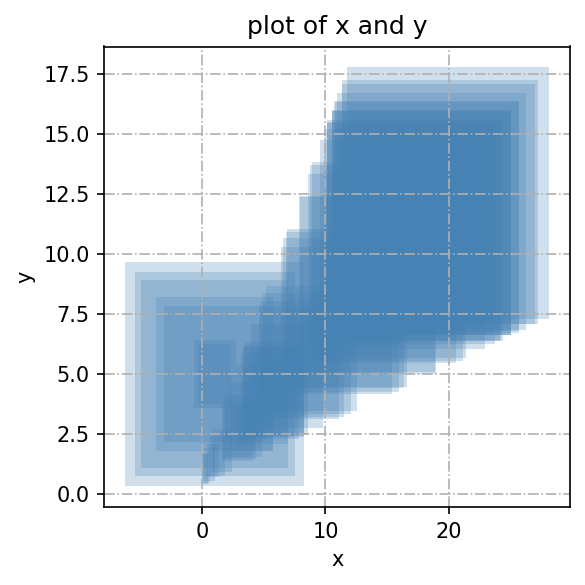

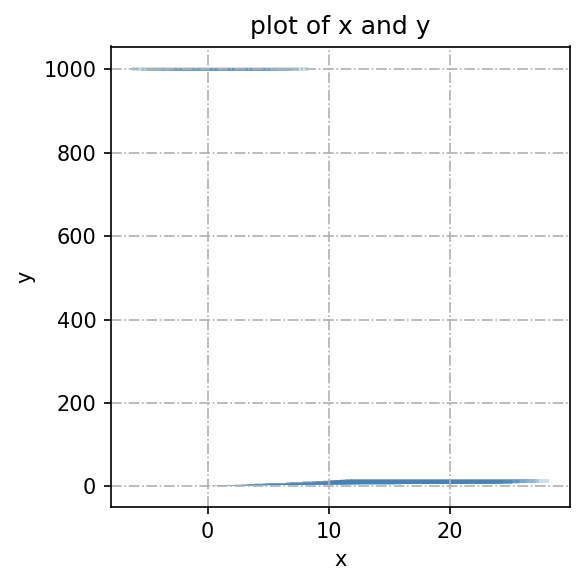

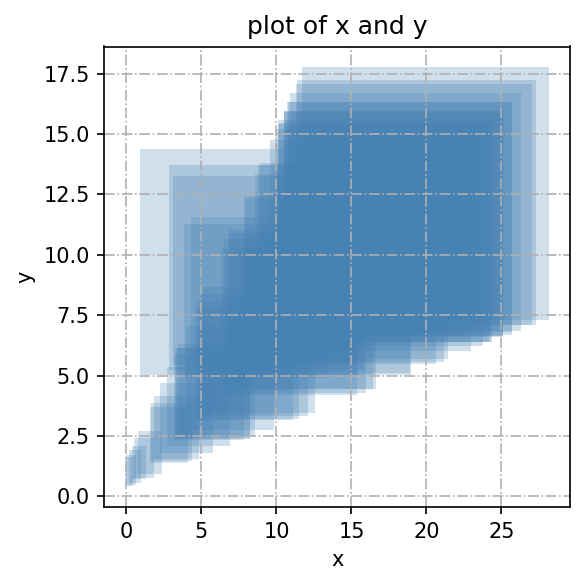

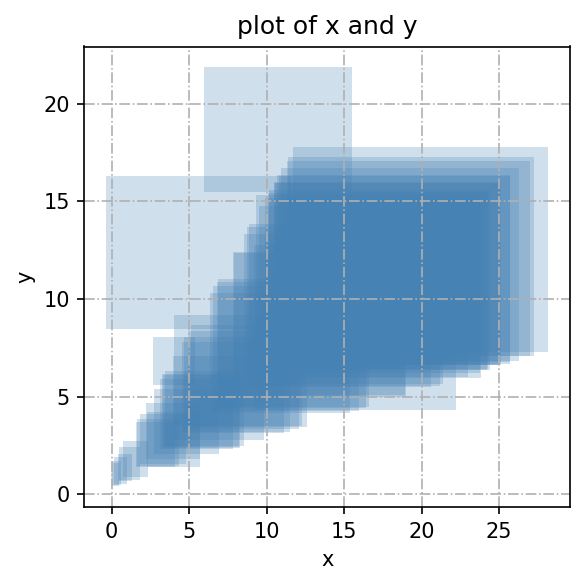

In [4]:
plot_simu_data2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, alpha=0.1, datasets=1)
plot_simu_data2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, alpha=0.1, datasets=2)
plot_simu_data2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, alpha=0.1, datasets=3)
plot_simu_data2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, alpha=0.1, datasets=4)

100%|██████████| 50/50 [00:47<00:00,  1.04it/s]


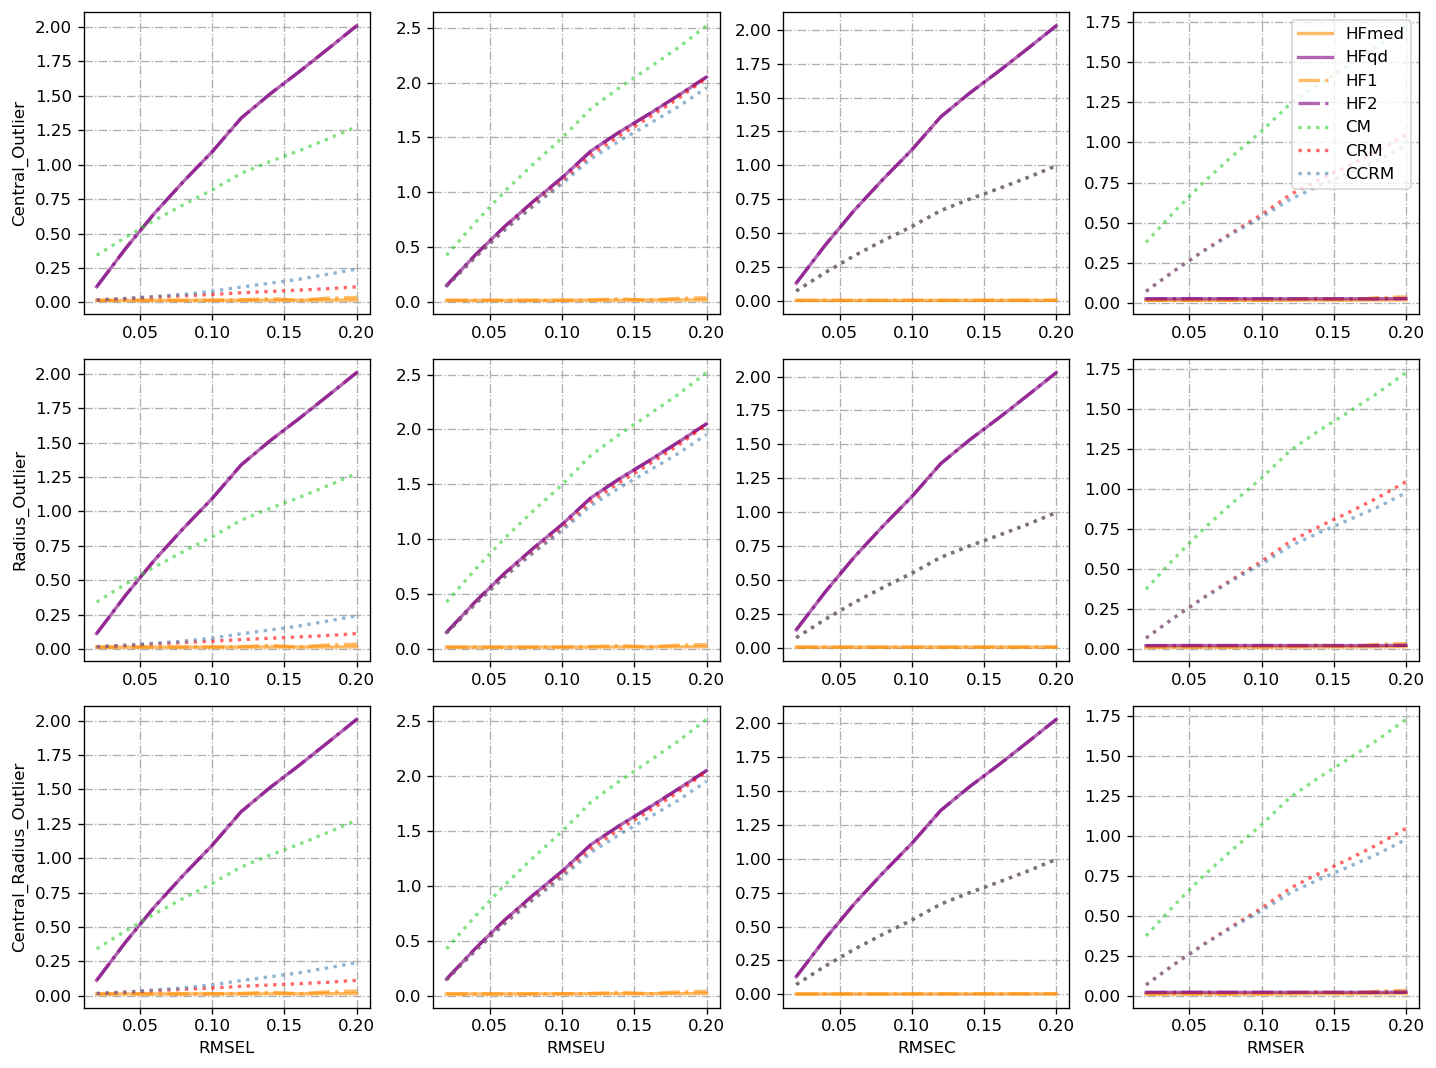

  8%|▊         | 4/50 [00:05<00:58,  1.27s/it]

In [ ]:
result1 = comparison_outlier2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, betahat_detail=True, datasets=1)
reg_rsme_plot(np.linspace(0.02,0.2,10), result1)
result2 = comparison_outlier2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, betahat_detail=True, datasets=2)
reg_rsme_plot(np.linspace(0.02,0.2,10), result2)
result3 = comparison_outlier2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, betahat_detail=True, datasets=3)
reg_rsme_plot(np.linspace(0.02,0.2,10), result3)
result4 = comparison_outlier2(0, 20, 0, 1, 0, 0.01, 0.2, 0.5, 0.1, 0.2, betahat_detail=True, datasets=4)
reg_rsme_plot(np.linspace(0.02,0.2,10), result4)